## Random Forest Project
For this project we will be exploring publicly available data from LendingClub.com. Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

Lending club had a very interesting year in 2016, so let's check out some of their data and keep the context in mind. This data is from before they even went public.

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full. 

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
loans=pd.read_csv('loan_data.csv')

In [4]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


# Exploratory Data Analysis

**Histogram of two FICO distributions on top of each other, one for each credit.policy outcome.**


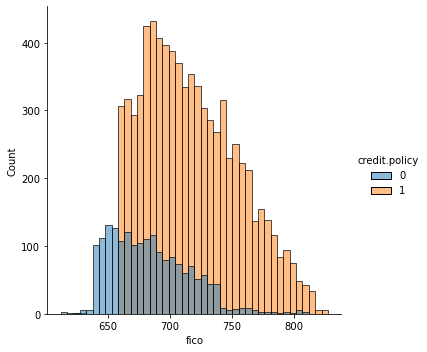

In [14]:
sns.displot(loans,x='fico',hue='credit.policy')

plt.show()

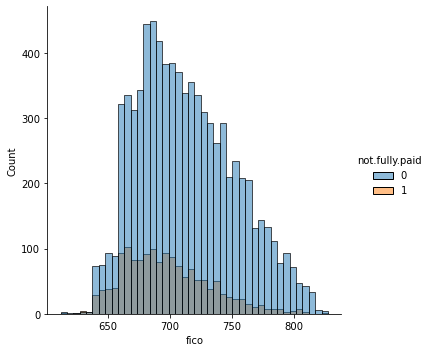

In [15]:
sns.displot(loans,x='fico',hue='not.fully.paid')

** Countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid. **

<AxesSubplot:xlabel='purpose', ylabel='count'>

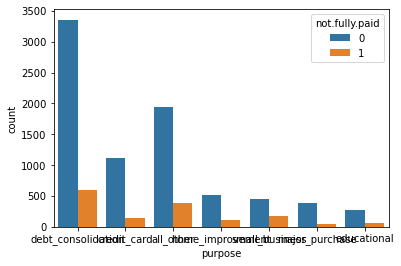

In [18]:
sns.countplot(x="purpose", hue="not.fully.paid", data=loans)

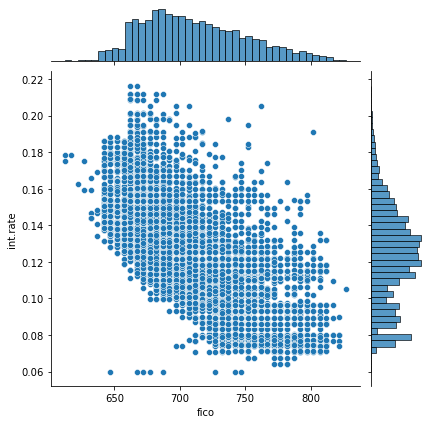

In [19]:
sns.jointplot(data=loans,x='fico',y='int.rate')

 **Trends differed between not.fully.paid and credit.policy**

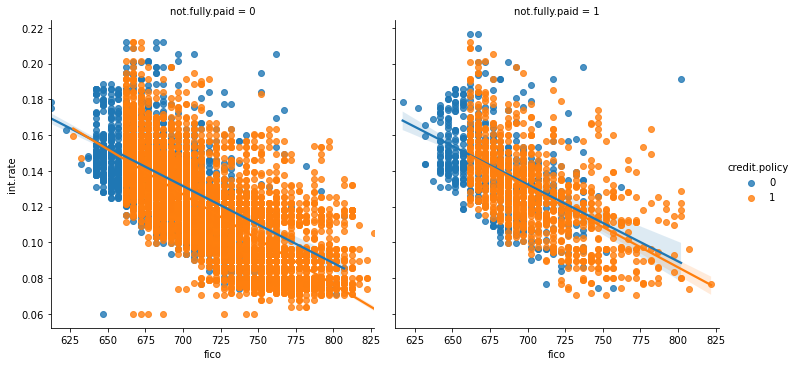

In [22]:
sns.lmplot(data=loans,x='fico',y='int.rate',hue='credit.policy',col='not.fully.paid')

## Categorical Features

The **purpose** column is categorical. Therefore will use dummy variables.


In [26]:
cat_feats=['purpose']


In [29]:
final_data=pd.get_dummies(loans,columns=cat_feats,drop_first=True)

In [31]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


## Train Test Split


In [44]:
from sklearn.model_selection import train_test_split 

In [45]:
X=final_data.drop('not.fully.paid',axis=1)
y=final_data["not.fully.paid"]

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## Training a Decision Tree Model

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
dtree=DecisionTreeClassifier()

In [50]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Predictions and Evaluation of Decision Tree


In [54]:
predictions=dtree.predict(X_test)

In [64]:
from sklearn.metrics import confusion_matrix, classification_report

In [65]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[2417   14]
 [ 429   14]]
              precision    recall  f1-score   support

           0       0.85      0.99      0.92      2431
           1       0.50      0.03      0.06       443

    accuracy                           0.85      2874
   macro avg       0.67      0.51      0.49      2874
weighted avg       0.80      0.85      0.78      2874



## Training the Random Forest model

In [66]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [67]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

## Predictions and Evaluation

In [68]:
predictions_rfc=rfc.predict(X_test)

In [71]:
print(classification_report(y_test,predictions_rfc))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.45      0.02      0.04       443

    accuracy                           0.85      2874
   macro avg       0.65      0.51      0.48      2874
weighted avg       0.79      0.85      0.78      2874



**Confusion Matrix for the predictions.**

In [72]:
print(confusion_matrix(y_test,predictions_rfc))

[[2419   12]
 [ 433   10]]


**As seens by the confusion matrix, the random forest model was a better fit for the data provided**